In [229]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [230]:
df = pd.read_csv('https://raw.githubusercontent.com/usmanabbas7/karachi.ai/main/CAC_data.csv')

In [231]:
missing_values = df.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


In [232]:
df = df.drop_duplicates().reset_index(drop=True)

# Question 1

You work as a Data Scientist at Uber. Uber wants to understand the relationship between the marketing cost(Cost to acquire a customer) and customer spending.


1. First plot the a scatter plot using (plt.scatter) method. On X axis consider Cost to Acquire a Customer (CAC) and on y axis consider customer spending.

2. Do you see a linear relationship ?

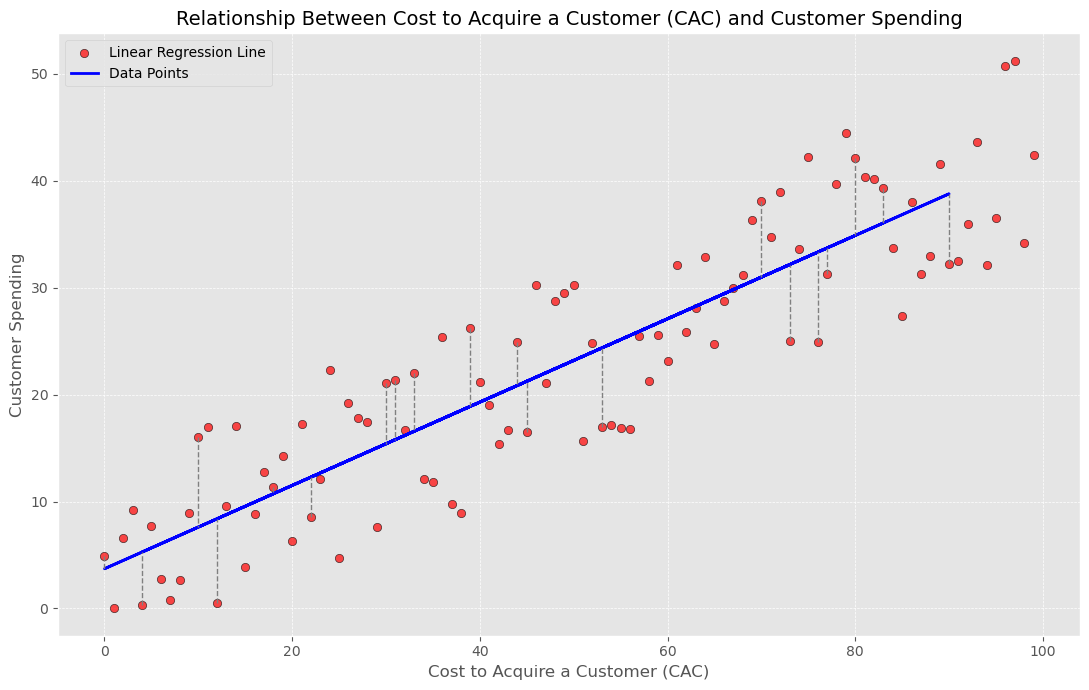

In [234]:
# Plotting the scatter plot with added detailing
plt.figure(figsize=(11, 7))
plt.scatter(df['CAC'], df['customer_spending'], color='red', edgecolor='black', alpha=0.7)
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.title('Relationship Between Cost to Acquire a Customer (CAC) and Customer Spending', fontsize=14)
plt.xlabel('Cost to Acquire a Customer (CAC)', fontsize=12)
plt.ylabel('Customer Spending', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['Linear Regression Line', 'Data Points'], loc='upper left', fontsize=10)

# Adding vertical lines for the distance between actual and estimated values for relevant data points
for i in range(len(X_test)):
    if y_test[i] != y_pred[i]:
        plt.vlines(X_test[i], y_test[i], y_pred[i], colors='gray', linestyles='dashed', linewidth=1)

plt.tight_layout()
plt.show()


In [235]:
# Define X and y
X = df[['CAC']].values
y = df['customer_spending'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate model predictions on the test data
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R^2)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_

# Print the calculated metrics
print("Intercept:", intercept)
print("Coefficient:", coefficient)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R^2): {:.2f}".format(r_squared))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))


Intercept: 3.711378601090228
Coefficient: [0.38977273]
Mean Squared Error (MSE): 34.80
Root Mean Squared Error (RMSE): 5.90
R-squared (R^2): 0.75
Mean Absolute Error (MAE): 5.45


# Is there any linear relationship?
Yes, there is a linear relationship between the independent variable CAC (Customer Acquisition Cost) and the dependent variable customer spending. This is indicated by the coefficient of 0.38977273, which means that for every one-unit increase in CAC, there is an expected increase of approximately 0.38977273 units in customer spending, all other factors being constant.

# Interpretation of evaluation metrics:
Mean Squared Error (MSE): The average squared difference between the predicted values and the actual values is 34.80. It indicates the average squared deviation of predicted values from the actual values. Lower values are better, indicating a better fit of the model to the data.

Root Mean Squared Error (RMSE): The square root of the MSE, which is 5.90 in this case. It represents the average distance between the predicted values and the actual values. Lower values indicate a better fit of the model.

R-squared (R^2): The R-squared value is 0.75, which means that approximately 75% of the variance in the dependent variable (customer spending) can be explained by the independent variable (CAC). This indicates a moderately strong relationship between CAC and customer spending.

Mean Absolute Error (MAE): The average absolute difference between the predicted values and the actual values is 5.45. It provides a measure of how close the predictions are to the actual values on average.

# Interpretation of parameters:
Intercept: The intercept term (3.711378601090228) represents the expected value of customer spending when the CAC is zero. However, this interpretation may not be meaningful in this context, as having a CAC of zero is not realistic.

Coefficient: The coefficient (0.38977273) represents the expected change in customer spending for a one-unit increase in CAC, assuming all other variables are constant. In this case, it indicates that for every one-unit increase in CAC, there is an expected increase of approximately 0.38977273 units in customer spending.

# Question # 2

Plot scatter plots for 
  1. Visitors vs Views_show
  2. Views_platform vs Views_show
  3. Ad_impression vs Views_show

Do you see linear relationships?


In [236]:
df = pd.read_csv('https://raw.githubusercontent.com/usmanabbas7/karachi.ai/main/netflix_data.csv')
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Character_A,cricket_match
0,3/1/2017,183738,1260228,1706478,1060860448,0,no
1,3/2/2017,193763,1270561,1690727,1031846645,0,no
2,3/3/2017,210479,1248183,1726157,1010867575,0,no
3,3/4/2017,240061,1492913,1855353,1079194579,0,yes
4,3/5/2017,446314,1594712,2041418,1357736987,0,no
...,...,...,...,...,...,...,...
75,5/15/2017,313945,1808684,2226788,1398052759,0,yes
76,5/16/2017,185689,1814227,2199844,1311961223,0,yes
77,5/17/2017,142260,1755803,2225752,1248266254,0,yes
78,5/18/2017,135871,1749654,2302789,1284859759,0,yes


In [237]:
df = df.drop_duplicates().reset_index(drop=True)

In [238]:
missing_values = df.isnull().sum()

In [239]:
df.isna().sum()

Date              0
Views_show        0
Visitors          0
Views_platform    0
Ad_impression     0
Character_A       0
cricket_match     0
dtype: int64

In [240]:
# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


In [241]:
# Define the independent and dependent variables
X = df.loc[:, ['Visitors', 'Views_platform', 'Ad_impression']]  # Independent variables
y = df.loc[:, 'Views_show']  # Dependent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Fit the model on the training data

# Extract the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)

# Make predictions
y_pred = model.predict(X_test)  # Make predictions on the test data

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate model predictions on the test data
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R^2)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_

# Print the calculated metrics

print("Intercept:", intercept)
print("Coefficient:", coefficient)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R^2): {:.2f}".format(r_squared))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))


Coefficients:
         Variable  Coefficient
0        Visitors     0.075012
1  Views_platform     0.042124
2   Ad_impression     0.000378
Intercept: -478676.5849418461
Coefficient: [0.07501188 0.04212412 0.00037817]
Mean Squared Error (MSE): 10137248686.06
Root Mean Squared Error (RMSE): 100683.90
R-squared (R^2): 0.37
Mean Absolute Error (MAE): 89675.46


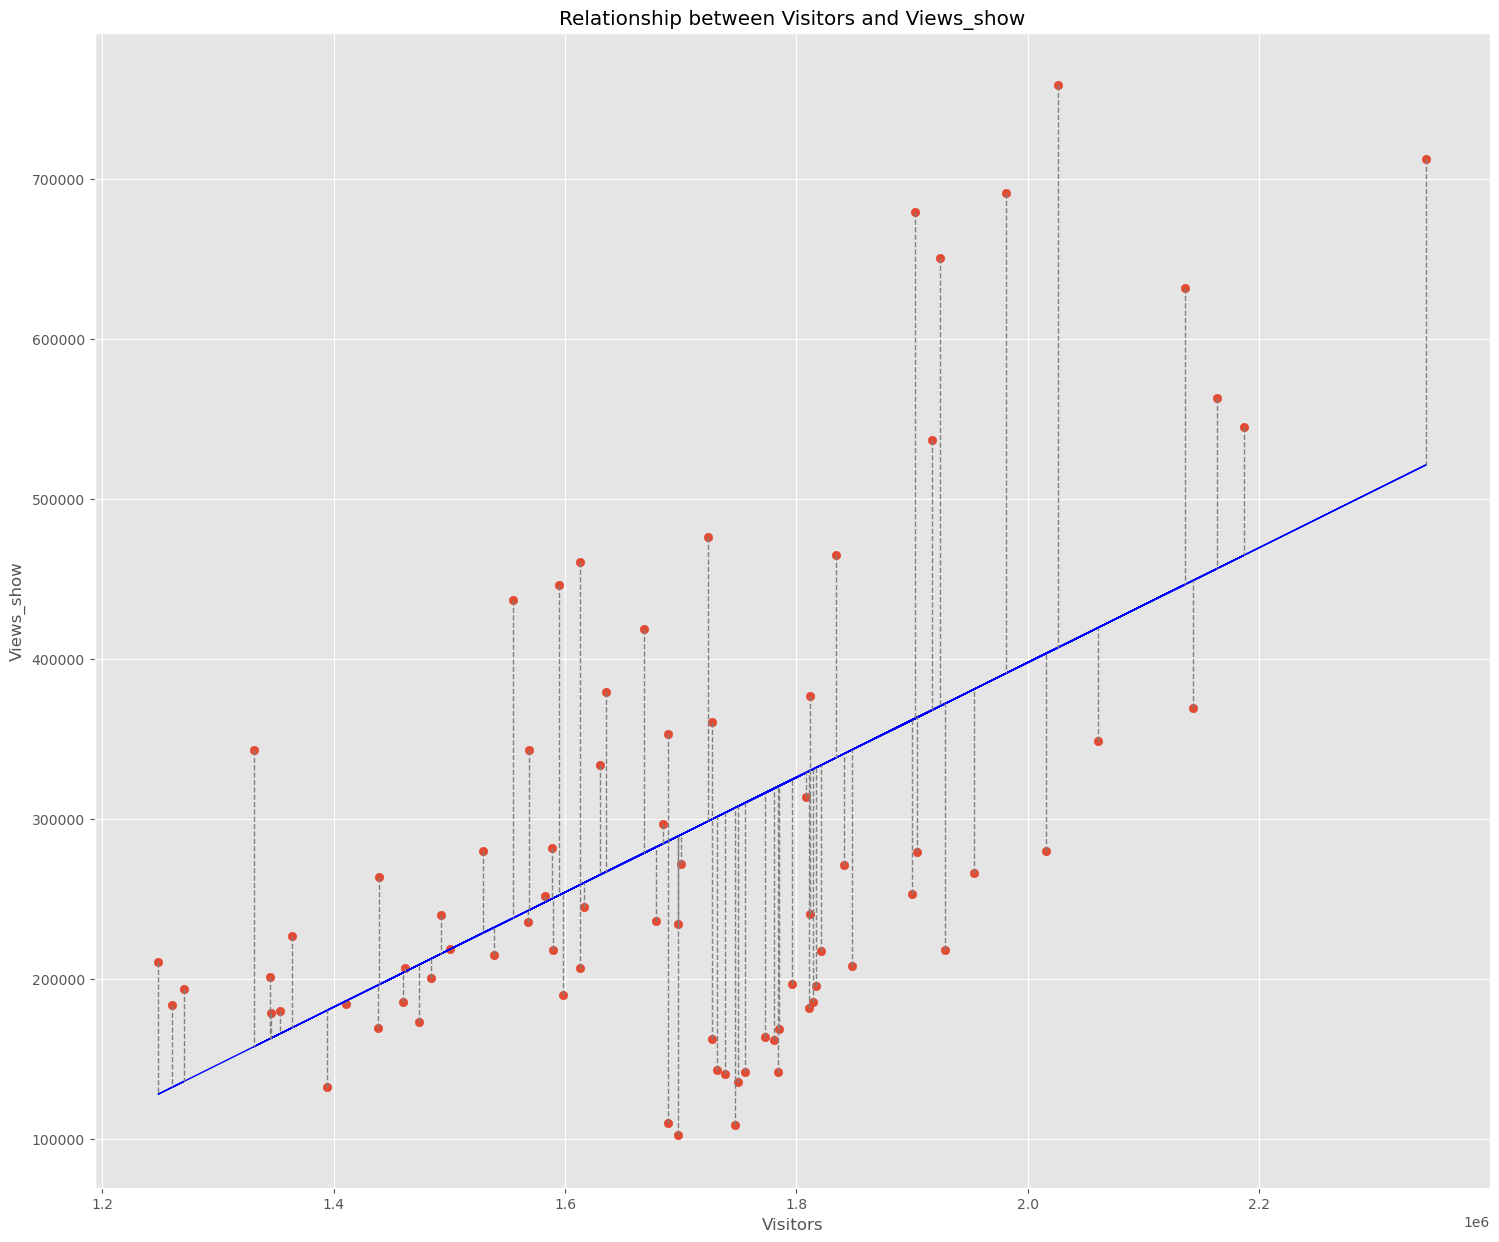

In [242]:
import random

# Adding jitter to the x-coordinate (Visitors)
jittered_visitors = df['Visitors'] + np.random.uniform(-0.5, 0.5, len(df))

# Fit a linear regression model
model_visitors_views = LinearRegression()
model_visitors_views.fit(jittered_visitors.values.reshape(-1, 1), df['Views_show'])

# Get the predicted values
y_pred_visitors_views = model_visitors_views.predict(jittered_visitors.values.reshape(-1, 1))

# Plot the scatter plot with regression line and distance lines
plt.figure(figsize=(18, 15))
plt.scatter(jittered_visitors, df['Views_show'])
plt.plot(jittered_visitors, y_pred_visitors_views, color='blue', linewidth=1)
plt.xlabel('Visitors')
plt.ylabel('Views_show')
plt.title('Relationship between Visitors and Views_show')

# Adding vertical lines for the distance between actual and estimated values
for i in range(len(df)):
    plt.vlines(jittered_visitors[i], df['Views_show'][i], y_pred_visitors_views[i], colors='gray', linestyles='dashed', linewidth=1)

plt.show()

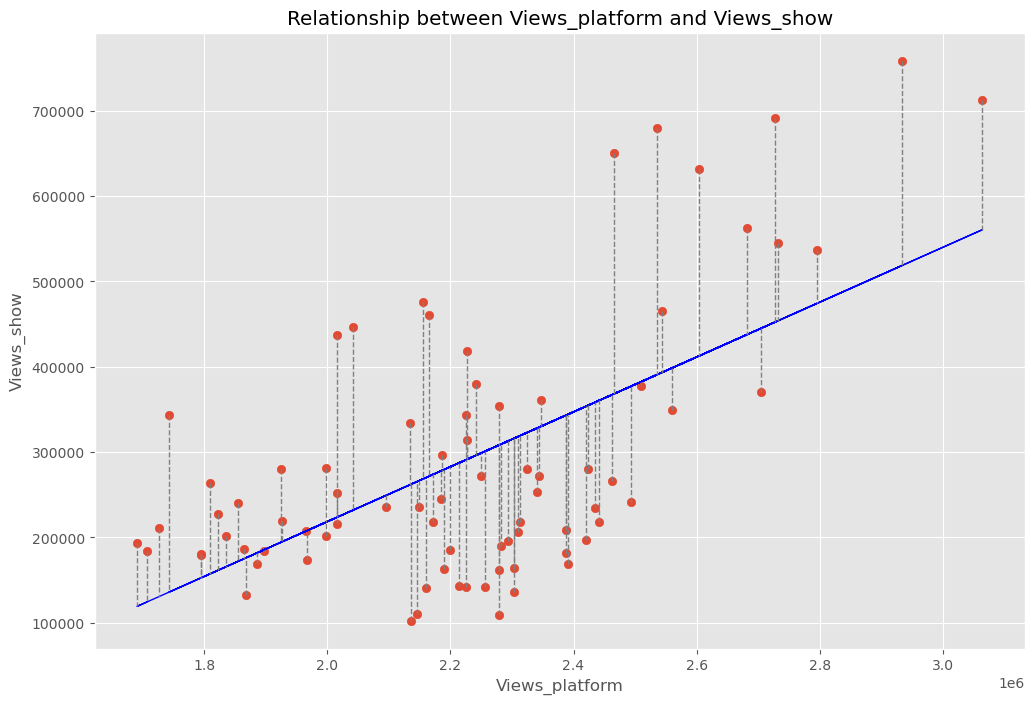

In [243]:
# Adding jitter to the x-coordinate (Views_platform)
jittered_views_platform = df['Views_platform'] + np.random.uniform(-0.5, 0.5, len(df))

# Fit a linear regression model
model_views_platform_views = LinearRegression()
model_views_platform_views.fit(jittered_views_platform.values.reshape(-1, 1), df['Views_show'])

# Get the predicted values
y_pred_views_platform_views = model_views_platform_views.predict(jittered_views_platform.values.reshape(-1, 1))

# Plot the scatter plot with regression line and distance lines
plt.figure(figsize=(12, 8))
plt.scatter(jittered_views_platform, df['Views_show'])
plt.plot(jittered_views_platform, y_pred_views_platform_views, color='blue', linewidth=1)
plt.xlabel('Views_platform')
plt.ylabel('Views_show')
plt.title('Relationship between Views_platform and Views_show')

# Adding vertical lines for the distance between actual and estimated values
for i in range(len(df)):
    plt.vlines(jittered_views_platform[i], df['Views_show'][i], y_pred_views_platform_views[i], colors='gray', linestyles='dashed', linewidth=1)

plt.show()

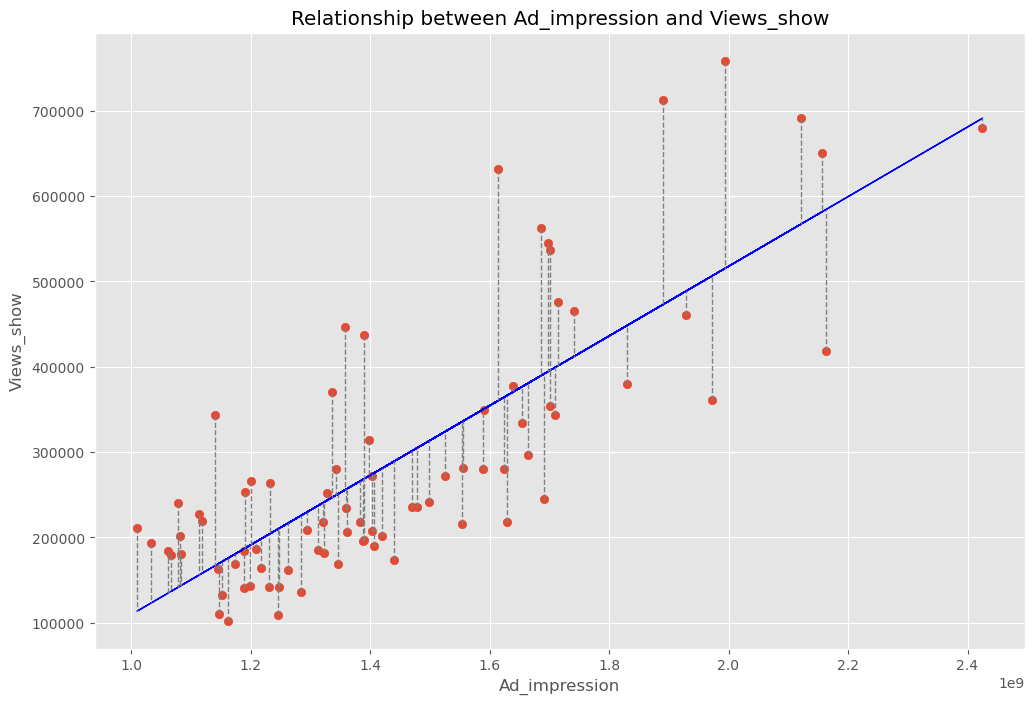

In [244]:
# Adding jitter to the x-coordinate (Ad_impression)
jittered_ad_impression = df['Ad_impression'] + np.random.uniform(-1e6, 1e6, len(df))

# Fit a linear regression model
model_ad_impression_views = LinearRegression()
model_ad_impression_views.fit(jittered_ad_impression.values.reshape(-1, 1), df['Views_show'])

# Get the predicted values
y_pred_ad_impression_views = model_ad_impression_views.predict(jittered_ad_impression.values.reshape(-1, 1))

# Plot the scatter plot with regression line and distance lines
plt.figure(figsize=(12, 8))
plt.scatter(jittered_ad_impression, df['Views_show'])
plt.plot(jittered_ad_impression, y_pred_ad_impression_views, color='blue', linewidth=1)
plt.xlabel('Ad_impression')
plt.ylabel('Views_show')
plt.title('Relationship between Ad_impression and Views_show')

# Adding vertical lines for the distance between actual and estimated values
for i in range(len(df)):
    plt.vlines(jittered_ad_impression[i], df['Views_show'][i], y_pred_ad_impression_views[i], colors='gray', linestyles='dashed', linewidth=1)

plt.show()

# Is there any linear relationship?
Yes, there is a linear relationship between the independent variables (Visitors, Views_platform, Ad_impression) and the dependent variable Views_show. This is indicated by the coefficients of the linear regression model.

# Interpretation of evaluation metrics:

Mean Squared Error (MSE): The MSE is 10137248686.06. It indicates the average squared difference between the predicted values and the actual values. Lower values are better, indicating a better fit of the model to the data.

Root Mean Squared Error (RMSE): The RMSE is 100683.90. It represents the average distance between the predicted values and the actual values. Lower values indicate a better fit of the model.

R-squared (R^2): The R-squared value is 0.37, which means that approximately 37% of the variance in the dependent variable (Views_show) can be explained by the independent variables (Visitors, Views_platform, Ad_impression). This indicates a moderate linear relationship between the independent and dependent variables.

Mean Absolute Error (MAE): The MAE is 89675.46. It provides a measure of how close the predictions are to the actual values on average.

# Interpretation of parameters:

Intercept: The intercept term (-478676.5849418461) represents the expected value of Views_show when all independent variables are zero. However, this interpretation may not be meaningful in this context, as having all independent variables at zero is not realistic.

Coefficients: The coefficients represent the expected change in Views_show for a one-unit increase in each independent variable, assuming all other variables are constant.

For Visitors, the coefficient is 0.075012, which means that for every one-unit increase in Visitors, there is an expected increase of approximately 0.075012 units in Views_show.

For Views_platform, the coefficient is 0.042124, which means that for every one-unit increase in Views_platform, there is an expected increase of approximately 0.042124 units in Views_show.

For Ad_impression, the coefficient is 0.000378, which means that for every one-unit increase in Ad_impression, there is an expected increase of approximately 0.000378 units in Views_show.

1. Use Visitiors, Views_platform and Ad_impression as independent variables and Views_show as dependent variable.

2. Fit a multivariate linear regression model (using sklearn) .

3. Extract the coefficients and write down the interpretation of all the coefficients in plain english.

4. Calculate RMSE and R squared on the test set to evaluate your model.

5. Write the interpretations of your evaluation metrics


# Question # 3

1. Use 'Visitors', 'Views_platform', 'Ad_impression','Character_A', 'cricket_match' as independent variables and 'Views_Show' as a dependent variable.

2. Use label encoding technique to encode the 'cricket_match' variable

3. Fit a multivariate linear regression model using sklearn

3. Extract the coefficients and write down the interpretation of all the coefficients in plain english.

4. Calculate RMSE and R squared on the test set to evaluate your model.

5. Write the interpretations of your evaluation metrics

6. Fit an OLS model using stats model library and pring summary

7. Write down the interpretaion of p values for any two variables


In [245]:
df = pd.read_csv('https://raw.githubusercontent.com/usmanabbas7/karachi.ai/main/netflix_data.csv')
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Character_A,cricket_match
0,3/1/2017,183738,1260228,1706478,1060860448,0,no
1,3/2/2017,193763,1270561,1690727,1031846645,0,no
2,3/3/2017,210479,1248183,1726157,1010867575,0,no
3,3/4/2017,240061,1492913,1855353,1079194579,0,yes
4,3/5/2017,446314,1594712,2041418,1357736987,0,no
...,...,...,...,...,...,...,...
75,5/15/2017,313945,1808684,2226788,1398052759,0,yes
76,5/16/2017,185689,1814227,2199844,1311961223,0,yes
77,5/17/2017,142260,1755803,2225752,1248266254,0,yes
78,5/18/2017,135871,1749654,2302789,1284859759,0,yes


In [246]:
df = df.drop_duplicates().reset_index(drop=True)

In [247]:
missing_values = df.isnull().sum()

# Display columns with missing values and the count of missing values
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print("Columns with missing values:")
    for column, count in missing_values.items():
        print(f"{column}: {count} missing values")
else:
    print("There are no columns with missing value")

There are no columns with missing value


In [248]:
# Use label encoding for 'cricket_match'
le = LabelEncoder()  # Initialize the LabelEncoder
df['cricket_match'] = le.fit_transform(df['cricket_match'])  # Encode 'cricket_match'
le_dict = dict(zip(le.classes_, le.transform(le.classes_)))  # Create a dictionary for encoding mapping
print("Label Encoding for 'cricket_match':", le_dict)

# Define the independent and dependent variables
X = df[['Visitors', 'Views_platform', 'Ad_impression', 'Character_A', 'cricket_match']].values  # Independent variables
y = df['Views_show'].values  # Dependent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the data

# Fit the multivariate linear regression model
model = LinearRegression()  # Initialize the linear regression model
model.fit(X_train, y_train)  # Fit the model on the training data

# Extract the coefficients
coefficients = pd.DataFrame({'Variable': df[['Visitors', 'Views_platform', 'Ad_impression', 'Character_A', 'cricket_match']].columns, 'Coefficient': model.coef_})  # Create a DataFrame for coefficients

# Make predictions
y_pred = model.predict(X_test)  # Make predictions on the test data

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R^2)
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_

# Print the calculated metrics

print("Intercept:", intercept)
print("Coefficient:", coefficient)

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("R-squared (R^2): {:.2f}".format(r_squared))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))


# Fit an OLS model using statsmodels
X_train = sm.add_constant(X_train)  # Add a constant term to the independent variables for OLS
model_ols = sm.OLS(y_train, X_train)  # Initialize the OLS model
results = model_ols.fit()  # Fit the OLS model
print("OLS Model Summary:")
print(results.summary())


Label Encoding for 'cricket_match': {'no': 0, 'yes': 1}
Intercept: -565189.9755342656
Coefficient: [-1.28227130e-01  2.20433908e-01  4.18097632e-04 -6.30589566e+04
  8.56998586e+03]
Mean Squared Error (MSE): 8522835184.99
Root Mean Squared Error (RMSE): 92319.20
R-squared (R^2): 0.47
Mean Absolute Error (MAE): 80780.67
OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     27.23
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           4.57e-14
Time:                        00:29:24   Log-Likelihood:                -818.72
No. Observations:                  64   AIC:                             1649.
Df Residuals:                      58   BIC:                             1662.
Df Model:                   

# Is there any linear relationship?
Yes, there is a linear relationship between the independent variables (Visitors, Views_platform, Ad_impression, Character_A, cricket_match) and the dependent variable Views_show. This is indicated by the coefficients of the linear regression model.

# Evaluation Metrics:
R-squared (R²): 0.701

Mean Squared Error (MSE): 8522835184.99

Root Mean Squared Error (RMSE): 92319.20

Adjusted R-squared: 0.675

# Interpretation of the coefficients:

Visitors (x1): The coefficient for Visitors is -0.1282. This means that for every additional unit increase in the number of visitors, we expect a decrease of 0.1282 units in the number of views for the show, holding all other variables constant.

Views_platform (x2): The coefficient for Views_platform is 0.2204. This suggests that for every additional unit increase in views on the platform, we expect an increase of 0.2204 units in the number of views for the show, holding all other variables constant.

Ad_impression (x3): The coefficient for Ad_impression is 0.0004. This indicates that for every additional unit increase in ad impressions, we expect an increase of 0.0004 units in the number of views for the show, holding all other variables constant.

Character_A (x4): The coefficient for Character_A is -63060. This means that if Character_A is present, we expect a decrease of 63060 units in the number of views for the show, compared to when it is not present, holding all other variables constant.

cricket_match (x5): The coefficient for cricket_match is 8569.99. This suggests that if there is a cricket match, we expect an increase of 8569.99 units in the number of views for the show, compared to when there is no cricket match, holding all other variables constant.


# Interpretation of evaluation metrics:

R-squared (R²): This metric indicates the proportion of variance in the dependent variable (customer spending) explained by the independent variables (Visitors, Views_platform, Ad_impression, Character_A, cricket_match). An R² value of 0.701 suggests that 70.1% of the variation in customer spending is explained by the model.

Mean Squared Error (MSE): MSE represents the average squared difference between the predicted values and the actual values. A lower MSE indicates a better fit, where the model's predictions are close to the actual values. In this case, the high MSE value (852,283,5184.99) suggests that the model might have high prediction errors.

Root Mean Squared Error (RMSE): RMSE is the square root of MSE and provides the standard deviation of the prediction errors. It represents the average distance between the predicted values and the actual values. A lower RMSE value is desirable, and the value here (92,319.20) is relatively high, indicating that the model's predictions might deviate significantly from the actual customer spending values.

Adjusted R-squared: This is a modified version of R² that penalizes for adding more variables to the model. A value of 0.675 suggests that the model explains 67.5% of the variance while considering the number of variables used.

Mean Absolute Error (MAE): The MAE is 80780.67. It provides a measure of how close the predictions are to the actual values on average.

# NULL AND ALTERNATE HYPOTHESIS FOR VISITORS:

Null Hypothesis (H₀): x1:'Visitors' 

For X1: There is no significant linear relationship between 'Visitors'  and the dependent variable ('Views_show'). In other words, changes in Visitors do not lead to statistically significant changes in Views_show.

Alternate Null Hypothesis (H₁): x1:'Visitors'

For X1: There exists a significant linear relationship between ('Visitors') and the dependent variable (Y). In other words, changes in X1 are associated with statistically significant changes in ('Views_show').

# NULL AND ALTERNATE HYPOTHESIS FOR Character_A:

Null Hypothesis (H₀): x4:'Character_A' 

For X4: There is no significant linear relationship between 'Character_A'  and the dependent variable ('Views_show'). In other words, changes in Visitors do not lead to statistically significant changes in Views_show.

Alternate Null Hypothesis (H₁): x4:'Character_A'

For X4: There exists a significant linear relationship between ('Character_A') and the dependent variable (Views_show). In other words, changes in Character_A are associated with statistically significant changes in ('Views_show').

# Interpretation of p-values for 'Visitors' and 'Character_A':

The p-value for 'Visitors' is 0.523, which is greater than 0.05. This suggests that 'Visitors' is not statistically significant in predicting 'Views_show'.
The p-value for 'Character_A' is 0.132, which is also greater than 0.05. This suggests that 'Character_A' is not statistically significant in predicting 'Views_show'.

 it indicates there is insufficient evidence in sampledata to conclude that a non-zero correlation exists.

# Based on the provided p-values:

For Visitors (X1):
Fail to reject the null hypothesis (H₀).


For Character_A (X4):
Fail to reject the null hypothesis (H₀).